<a href="https://colab.research.google.com/github/Slimlav/Netology/blob/main/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D1%8F_%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D1%8F_DS_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Понимание бизнеса

**1.1 Цель**
- Определить качество вина на основе данных факторов(признаков)

**1.2 Описание**

Два набора данных относятся к красному и белому вариантам португальского вина «Vinho Verde». Ссылка [Cortez et al., 2009]. Из соображений конфиденциальности и логистики доступны только физико-химические (входные) и органолептические (выходные) переменные (например, нет данных о сортах винограда, марке вина, продажной цене вина и т. д.).

# 2. Data Understanding

**2.1 Import Libraries**

In [94]:
# Игнорировать предупреждения
import warnings
warnings.filterwarnings('ignore')

# Обработка табличных данных и матриц
import numpy as np
import pandas as pd

# Алгоритмы моделирования
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from scipy.stats import uniform
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import RandomizedSearchCV

# Помощники по моделированию
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import  Normalizer , scale
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Визуализация
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Настройка визуализаций
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

**2.2 Вспомогательные функции**

In [2]:
def plot_correlation_map( df ):
    corr = winequality .corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

**2.3 Загрузка данных**

In [3]:
winequality = pd.read_csv('winequalityN.csv')
winequality 

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


**Описание переменных**

1. фиксированная кислотность
2. летучая кислотность
3. лимонная кислота
4. остаточный сахар
5. хлориды
6. свободный диоксид серы
7. общий диоксид серы
8. плотность
9. рН
10. сульфаты
11. спирт
- Выходная переменная (на основе сенсорных данных):
12. качество (оценка от 0 до 10)




**2.4.1 Далее взглянем на некоторую ключевую информацию о переменных**

In [4]:
winequality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**2.4.2 Тепловая карта корреляции может дать нам понимание того, какие переменные важны**

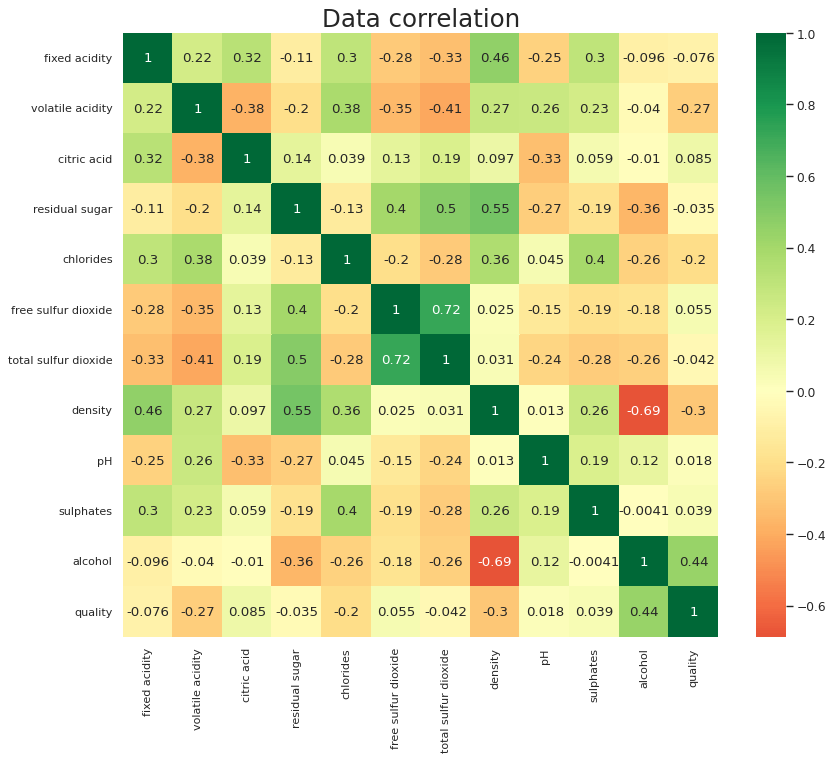

In [29]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(winequality.corr(), xticklabels=winequality.corr().columns, yticklabels=winequality.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Data correlation', fontsize=22)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

По тепловой карте видим что больше все на качество влияют переменные:alcohol,density,volatile acidity,chlorides, влияние остальных незначительно

# 3. Data Preparation

**3.1 Пропуски в данных**
- так как пропусков меньше 1% данных, принимаем решение - удалить пропуски.

In [6]:
winequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
winequality = winequality.dropna()
winequality.shape

(6463, 13)

**3.2 Сбалансированность данных**

In [8]:
winequality['quality'].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

По данным мы видим что они не сбалансированные, нет данных которые прдставляют quality по оценкам: 1,2,3,10, что повличент за собой невозможность модели предсказывать качество которое соотносится к этим оценкам.
У нас нет возможности добавить данные по этим оценкам, мы можем создать синтетические признаки, но будем исходить из той парадигмы, что набор данных показывает исчерпываюшие признаки по винам и других возможно нет(или имеются в малом количестве)


**3.3. Поиск выбросов**
- Будем искать выбросы на признаках которые в дальшейшем мы пустим в модель: alcohol,density,volatile acidity,chlorides

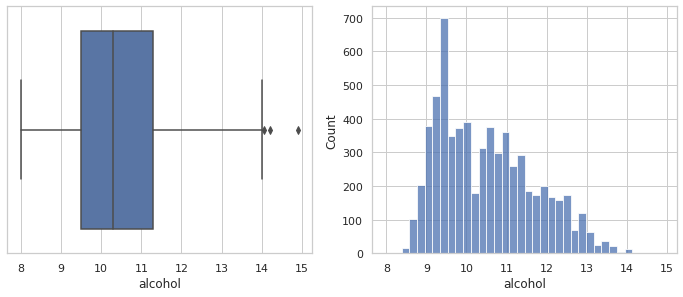

In [9]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
plt.figure(figsize=(12,10))

plt.subplot(2, 2, 1)
ax = sns.boxplot(winequality['alcohol'])
plt.subplot(2, 2, 2)
ax = sns.histplot(winequality['alcohol'])

In [10]:
winequality_updated = winequality[winequality['alcohol']<14]

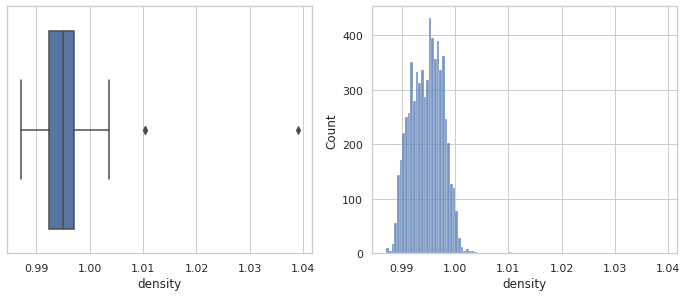

In [11]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
plt.figure(figsize=(12,10))

plt.subplot(2, 2, 1)
ax = sns.boxplot(winequality['density'])
plt.subplot(2, 2, 2)
ax = sns.histplot(winequality['density'])

In [12]:
winequality_updated = winequality_updated[winequality_updated['density']<1.01]

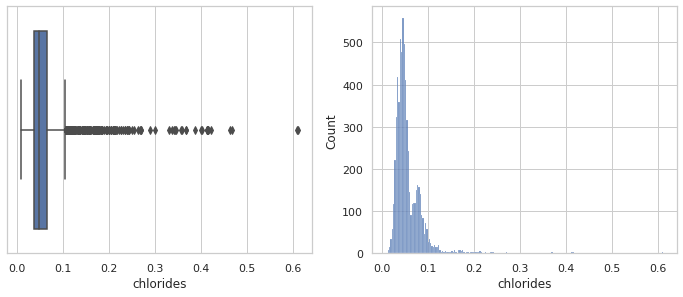

In [13]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
plt.figure(figsize=(12,10))

plt.subplot(2, 2, 1)
ax = sns.boxplot(winequality['chlorides'])
plt.subplot(2, 2, 2)
ax = sns.histplot(winequality['chlorides'])

In [14]:
winequality_updated = winequality_updated[winequality_updated['chlorides']<1.5]

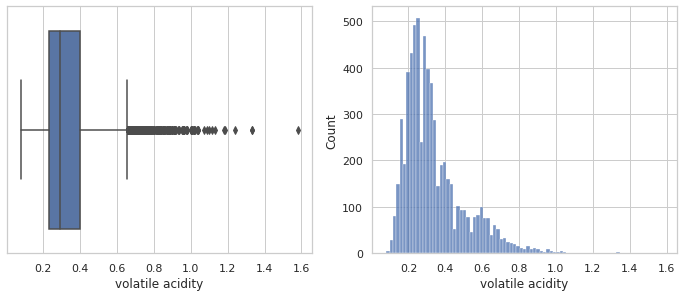

In [15]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
plt.figure(figsize=(12,10))

plt.subplot(2, 2, 1)
ax = sns.boxplot(winequality['volatile acidity'])
plt.subplot(2, 2, 2)
ax = sns.histplot(winequality['volatile acidity'])

In [16]:
winequality_updated = winequality_updated[winequality_updated['volatile acidity']<1]

In [17]:
winequality_updated.shape

(6419, 13)

После удаления выбросов наши данные уменьшились меньше чем на 1%

**3.3 Feature Engineering – добавляем новые признаки**

In [19]:
le = LabelEncoder()
le.fit(winequality_updated['type'])
le.classes_
le.transform(winequality_updated['type'].tolist())
winequality_updated['type'] = pd.Series(data = le.transform(winequality_updated['type']))

In [25]:
winequality_updated = winequality_updated.dropna()

In [31]:
winequality_updated = winequality_updated[['type','volatile acidity', 'chlorides','density', 'alcohol',
       'quality']]

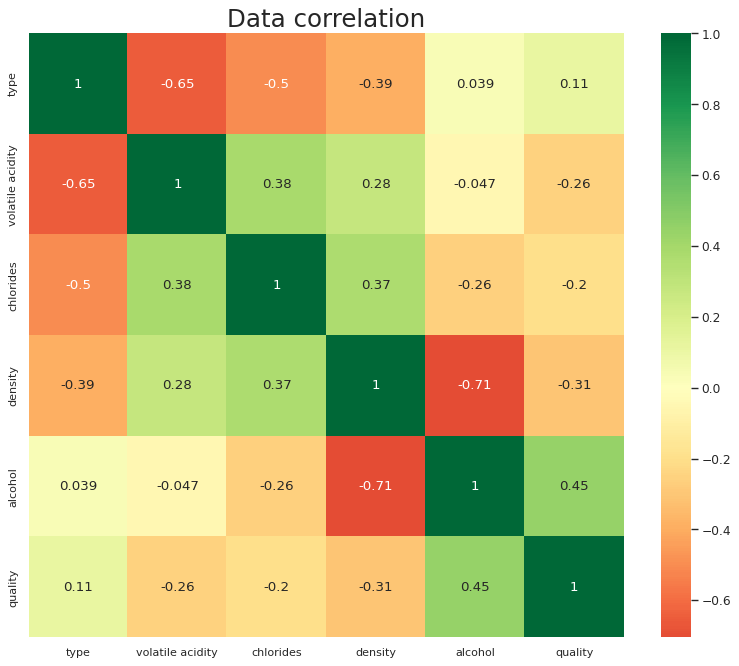

In [32]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(winequality_updated.corr(), xticklabels=winequality_updated.corr().columns, yticklabels=winequality_updated.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Data correlation', fontsize=22)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Преобразовали признак type, который стал 5м признаком для нашей модели.

**3.4 Сборка финальных датасетов для моделирования**

Выбираем признаки для формирования итогового датасета. У нас доступны признаки:
- type
- volatile acidity 
- chlorides 
- density
- alcohol

**3.4.2 Создание датасетов**
 - Отделяем данные для обучения и для проверки

In [36]:
X = winequality_updated.drop('quality', axis = 1)
y = winequality_updated['quality']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

In [48]:
scaler_test = preprocessing.StandardScaler().fit(X_test)
X_scaled_test = scaler_test.transform(X_test)

**4. Моделирование**
- Теперь мы выберем модель, которую хотели бы попробовать. Используем обучающий набор данных для обучения модели и затем проверим ее с помощью тестового набора.

**4.1 Выбор модели**
> Возьмем 6 моделей и оптимизируем параметры, и найдем лучшую



In [95]:
models = [
    {'name':'NB','model': BernoulliNB(),'params':{'alpha':uniform(loc=0,scale=4)}},
    {'name':'Lr','model': LogisticRegression(),'params':{'C':[0.1,0.2,0.3,0.5,0.7,1],'penalty':['l1','l2', 'elasticnet', 'none'],'tol': [0.000001,0.00001,0.0001,0.001,0.01,0.1,],'fit_intercept':[True,False] }},
    {'name':'SVC','model': SVC(),'params':{'C':[0.1,0.2,0.3,0.5,0.7,1],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}},
    {'name':'RF','model': RandomForestClassifier(),'params':{'n_estimators': list(range(10, 301)), 'criterion':['gini', 'entropy', 'log_loss'],'max_depth': list(range(1, 30))}},
    {'name':'KN','model': KNeighborsClassifier(),'params':{'n_neighbors': list(range(1, 30)),'weights':['uniform','distance'],'p':[1,2]}},
    {'name':'DT','model': DecisionTreeClassifier(),'params':{'criterion':['gini', 'entropy', 'log_loss'],'max_depth': list(range(1, 30))}}
]

res=[]
for v in models:
  res.append((v['name'],RandomizedSearchCV(v['model'],v['params'],cv=10).fit(X_scaled, y_train)))

In [96]:
for r in res:
  print(r[0],r[1].best_score_,r[1].best_params_)

NB 0.4269184177421609 {'alpha': 1.2981982627707191}
Lr 0.5352734939197689 {'tol': 1e-05, 'penalty': 'none', 'fit_intercept': True, 'C': 0.2}
SVC 0.5423601080929974 {'kernel': 'rbf', 'C': 1}
RF 0.6414577800555996 {'n_estimators': 223, 'max_depth': 24, 'criterion': 'entropy'}
KN 0.6522888226249826 {'weights': 'distance', 'p': 2, 'n_neighbors': 29}
DT 0.5805719921104536 {'max_depth': 28, 'criterion': 'entropy'}


**4.2 Обучение модели**

In [110]:
KN = KNeighborsClassifier(weights='distance', p= 2, n_neighbors = 29)
KN.fit(X_scaled, y_train)

KNeighborsClassifier(n_neighbors=29, weights='distance')

**5. Оценка**
> Теперь мы собираемся оценить модель

**5.1 Модель**
> Мы можем оценить точность модели, используя набор для теста, где мы знаем фактический результат. Этот набор данных не использовался для обучения, поэтому он абсолютно новый для модели.

> Затем мы сравниваем точность с точностью при использовании модели на тренировочных данных. Если разница между ними значительна, это свидетельствует о переобучении. Мы стараемся избегать этого, потому что это означает, что модель не будет хорошо обобщаться на новые данные (будет работать плохо)

In [111]:
print(KN.score(X_scaled, y_train), KN.score(X_scaled_test, y_test))

0.9992119779353822 0.6099290780141844


Видим что даже после оптимизации параметров, идет переобучение, можем снизить параметры и получить более скромную метрику, но уже без переобучения.